In [7]:
%pylab inline
import pylab as plt
import numpy as np



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


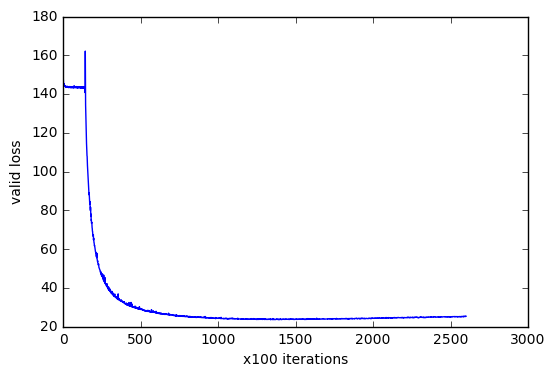

In [20]:
data = np.load('.model/baseline_fren.npz')
errors = data['history_errs']
plt.plot(errors)
plt.xlabel('x100 iterations')
plt.ylabel('valid loss')
plt.show()